# Loading the Dataset

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, roc_auc_score

In [2]:
df = pd.read_excel('Concrete_data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# Data Cleaning

In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [6]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# Splitting the Data

In [9]:
x = df.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']
x_train, x_set, y_train, y_set = train_test_split(x, y, test_size=0.30, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_set, y_set, test_size=0.50, random_state=42)

# Data Visualization

Univariate Analysis

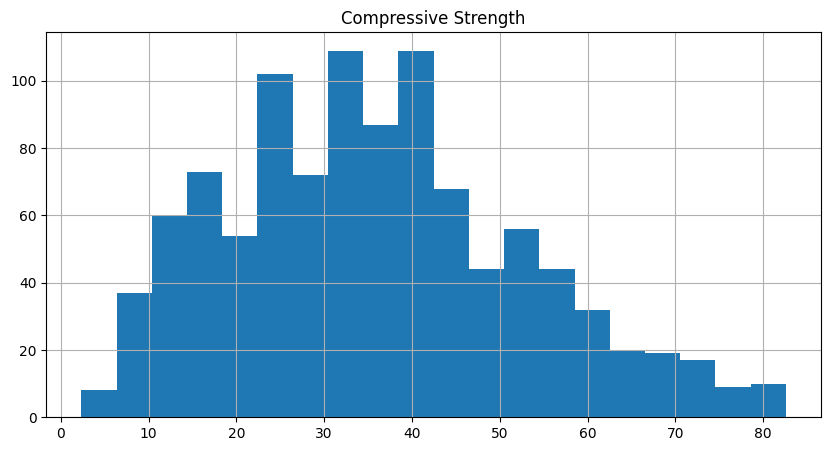

In [10]:
plt.figure(figsize=(10,5))
df['Concrete compressive strength(MPa, megapascals) '].hist(bins=20)
plt.title('Compressive Strength')
plt.show()

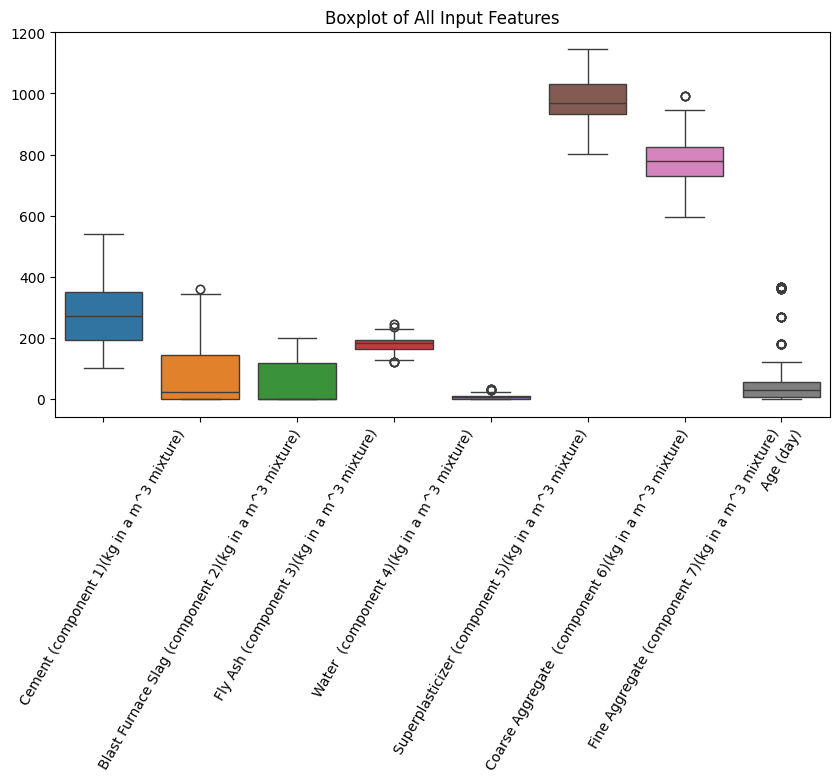

In [11]:
feature_cols = df.columns[:-1]   #all except last feature (target) 

plt.figure(figsize=(10,5))
sns.boxplot(data=df[feature_cols])
plt.xticks(rotation=60)
plt.title("Boxplot of All Input Features")
plt.show()

Bivariate Analysis:

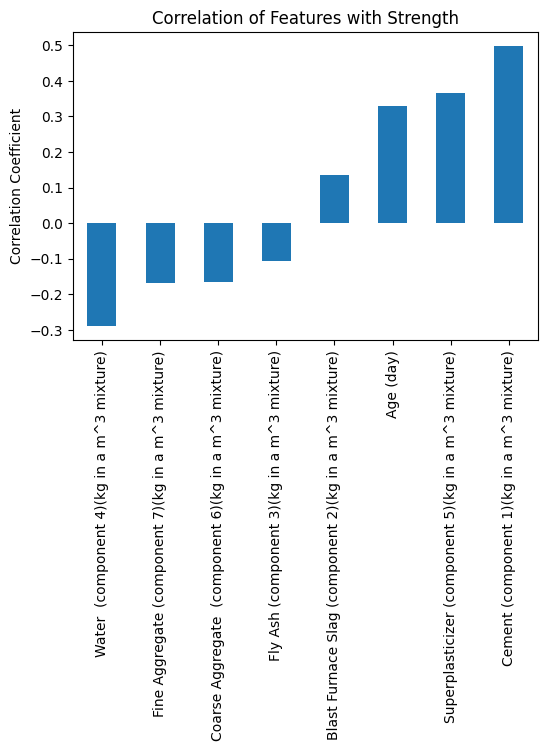

In [12]:
corr = df.corr()

target_corr = corr['Concrete compressive strength(MPa, megapascals) '].drop('Concrete compressive strength(MPa, megapascals) ')

plt.figure(figsize=(6,4))
target_corr.sort_values().plot(kind='bar')
plt.title("Correlation of Features with Strength")
plt.ylabel("Correlation Coefficient")
plt.show()

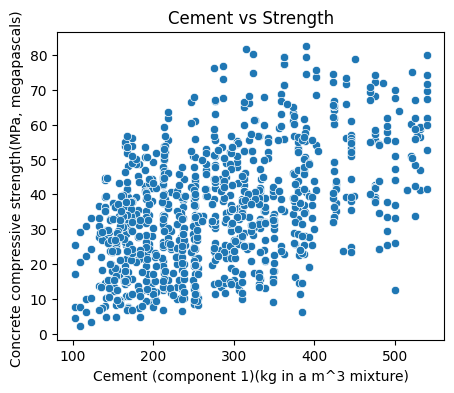

In [13]:
plt.figure(figsize=(5,4))
sns.scatterplot(x = df['Cement (component 1)(kg in a m^3 mixture)'], y = df['Concrete compressive strength(MPa, megapascals) '])
plt.title("Cement vs Strength")
plt.show()

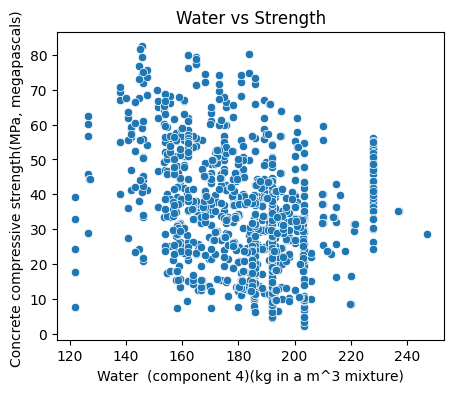

In [14]:
plt.figure(figsize=(5,4))
sns.scatterplot(x = df['Water  (component 4)(kg in a m^3 mixture)'], y = df['Concrete compressive strength(MPa, megapascals) '])
plt.title("Water vs Strength")
plt.show()

Multivariate Analysis

<Axes: >

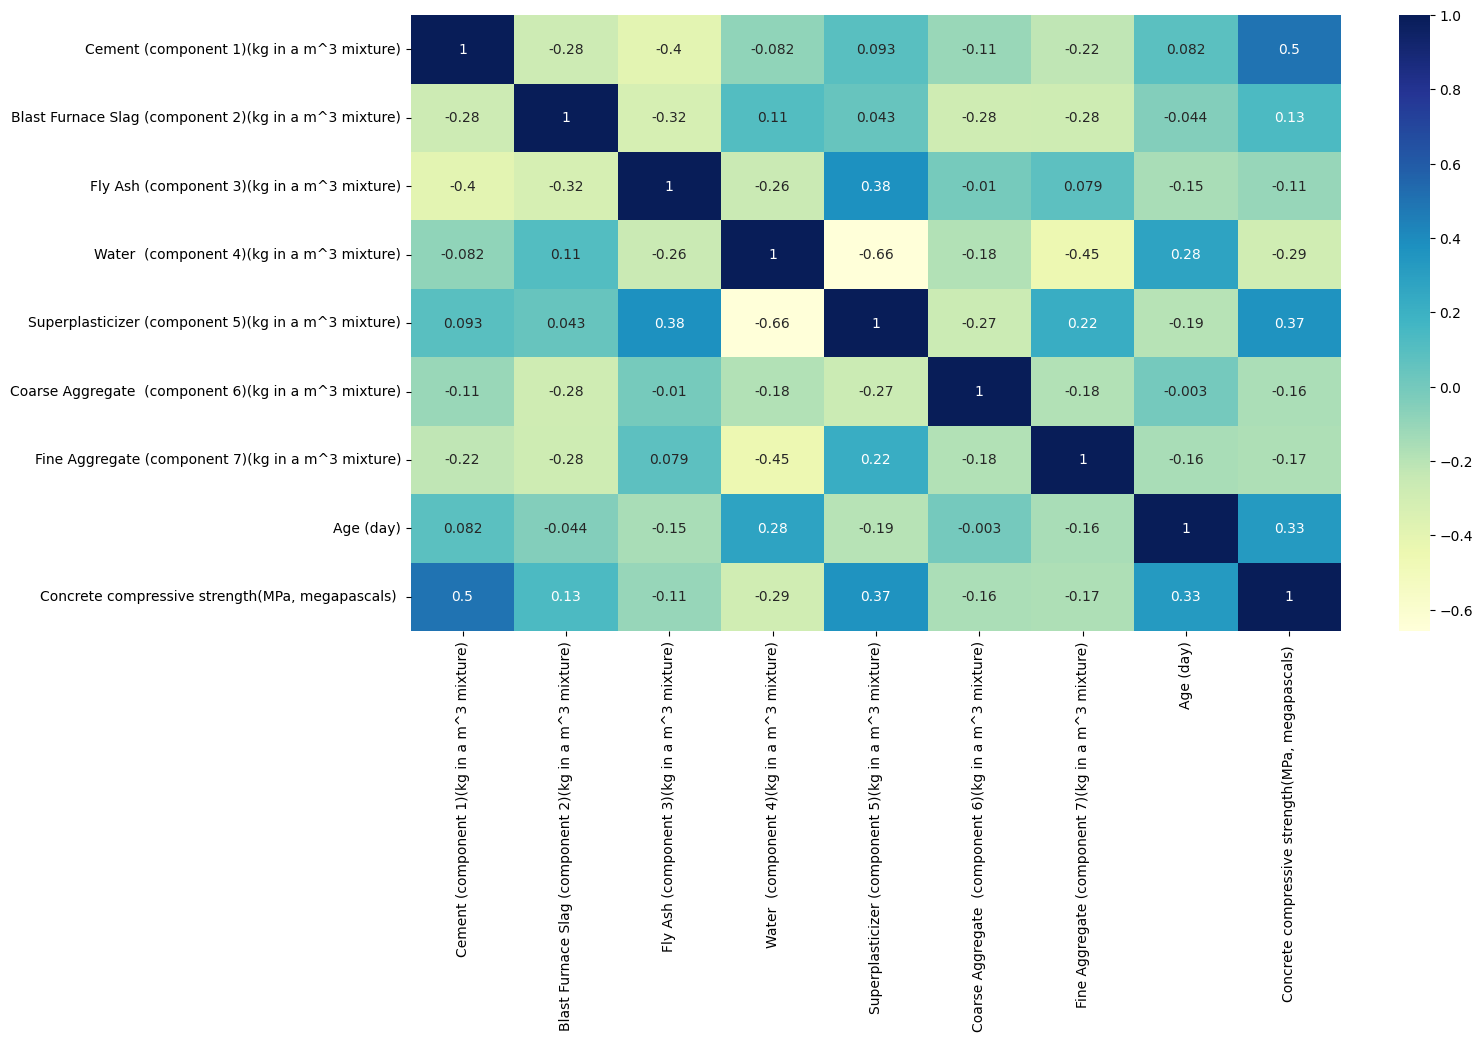

In [15]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

<Figure size 2000x2000 with 0 Axes>

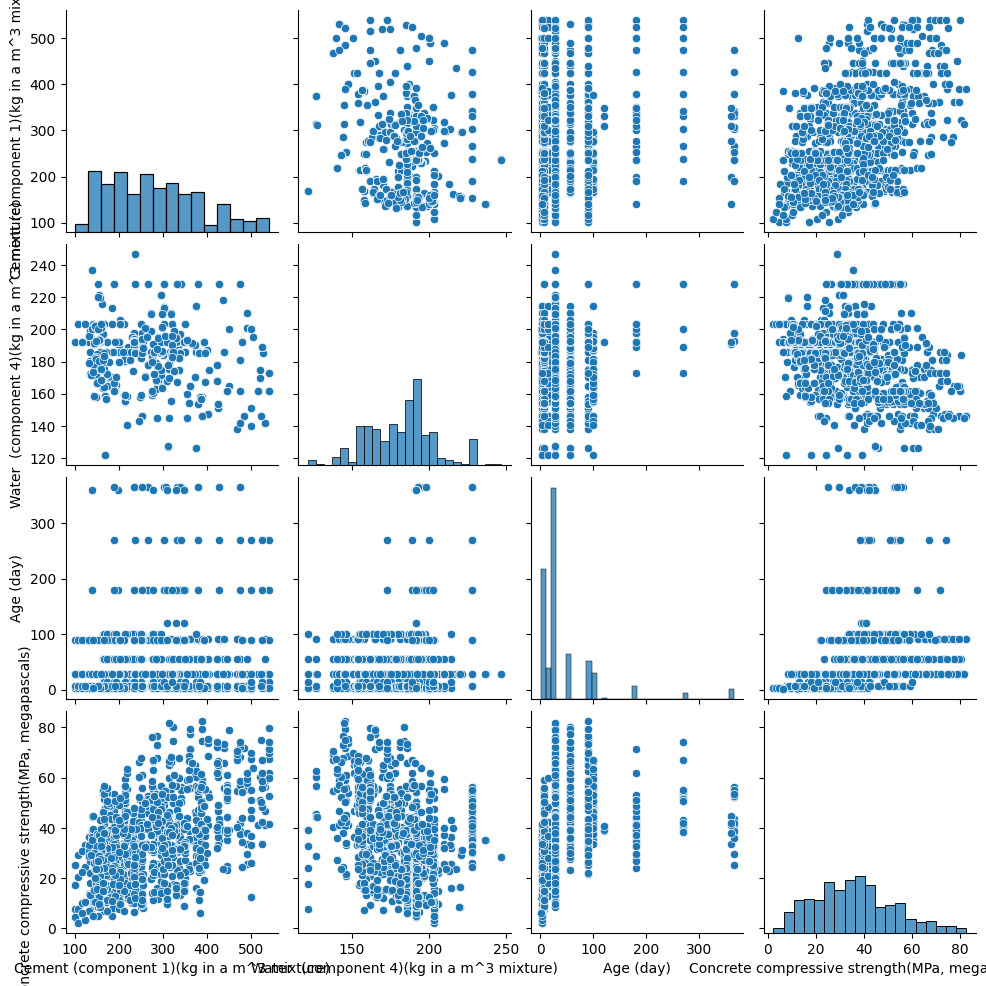

In [33]:
plt.figure(figsize = (20,20))
pair_cols = ['Cement (component 1)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']

sns.pairplot(df[pair_cols])
plt.show()

In [17]:
class AdaBoostR2Scratch:
    def __init__(self, M):
        self.M = M
        self.models = []
        self.betas = []

    def fit(self, x, y):
        n = len(y)
        w = np.ones(n) / n   

        for m in range(self.M):
            stump = DecisionTreeRegressor(max_depth=1)
            stump.fit(x, y, sample_weight=w)

            y_pred = stump.predict(X)
            error = np.abs(y - y_pred)

            
            max_error = error.max()
            if max_error == 0:
                break
            error = error / max_error

            weighted_error = np.sum(w * error)

            if weighted_error >= 0.5:
                break

            beta = weighted_error / (1 - weighted_error)

            
            w = w * (beta ** (1 - error))
            w = w / np.sum(w)

            self.models.append(stump)
            self.betas.append(beta)

    def predict(self, x):
        preds = np.array([model.predict(X) for model in self.models])
        betas = np.array(self.betas)

        weights = np.log(1 / betas)
        weighted_preds = np.average(preds, axis=0, weights=weights)

        return weighted_preds


In [20]:
M_values = [5, 10, 20, 40, 60, 80, 100, 150, 200, 500, 1000, 5000, 10000]
val_scores = []

for M in M_values:
    model = AdaBoostR2Scratch(M=M)
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    score = r2_score(y_val, y_val_pred)
    val_scores.append(score)
    print(f"M = {M}, Validation R2 = {score:.4f}")


M = 5, Validation R2 = 0.3790
M = 10, Validation R2 = 0.4135
M = 20, Validation R2 = 0.4186
M = 40, Validation R2 = 0.4434
M = 60, Validation R2 = 0.4440
M = 80, Validation R2 = 0.4533
M = 100, Validation R2 = 0.4533
M = 150, Validation R2 = 0.4533
M = 200, Validation R2 = 0.4533
M = 500, Validation R2 = 0.4533
M = 1000, Validation R2 = 0.4533
M = 5000, Validation R2 = 0.4533
M = 10000, Validation R2 = 0.4533


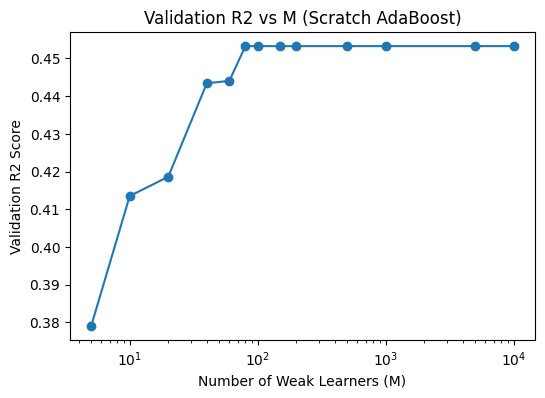

In [21]:
plt.figure(figsize=(6,4))
plt.plot(M_values, val_scores, marker='o')
plt.xscale('log')
plt.xlabel("Number of Weak Learners (M)")
plt.ylabel("Validation R2 Score")
plt.title("Validation R2 vs M (Scratch AdaBoost)")
plt.show()

In [22]:
best_M = M_values[np.argmax(val_scores)]
print("Best M:", best_M)

Best M: 1000


In [25]:
best_model = AdaBoostR2Scratch(M=best_M)
best_model.fit(x_train, y_train)

y_test_pred = best_model.predict(x_test)
test_r2_scratch = r2_score(y_test, y_test_pred)

print("Scratch AdaBoost Test R2:", test_r2_scratch)

Scratch AdaBoost Test R2: 0.5168075936539738


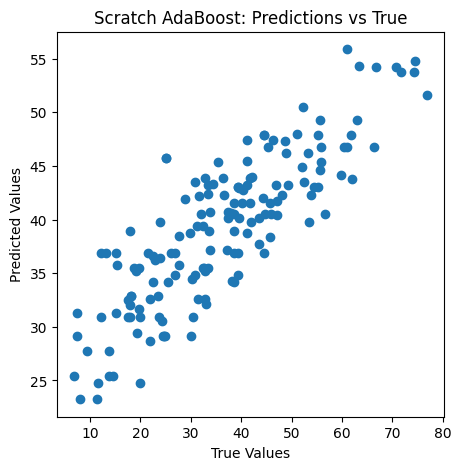

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Scratch AdaBoost: Predictions vs True")
plt.show()

In [27]:
sk_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=1),
    n_estimators=best_M,
    random_state=42
)

sk_model.fit(x_train, y_train)

y_test_pred_sk = sk_model.predict(x_test)
test_r2_sk = r2_score(y_test, y_test_pred_sk)

print("Sklearn AdaBoost Test R2:", test_r2_sk)

Sklearn AdaBoost Test R2: 0.5277191342582714


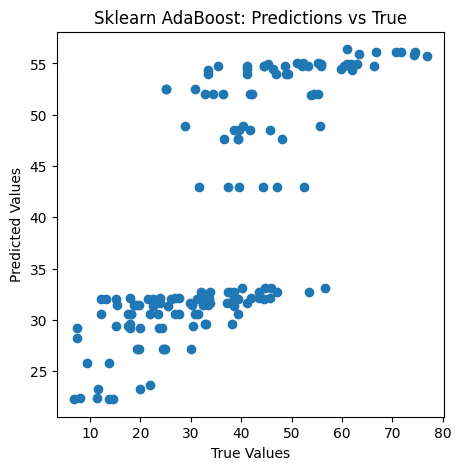

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_pred_sk)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Sklearn AdaBoost: Predictions vs True")
plt.show()

In [30]:
print("Comparison")
print(f"Scratch R2:  {test_r2_scratch:.4f}")
print(f"Sklearn R2:  {test_r2_sk:.4f}")
print(f"Difference:  {abs(test_r2_scratch - test_r2_sk):.4f}")

Comparison
Scratch R2:  0.5168
Sklearn R2:  0.5277
Difference:  0.0109
